In [1]:
# Importing Header Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('tweets_dataset.csv', encoding='latin1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['target','ids','date','flag','user','text']
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
# coverting date of Dtype object to datetime object
df['date'] = pd.to_datetime(df.date)
df.info()

C:\Users\Luv Sharma\AppData\Local\Temp\ipykernel_9964\359310962.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df.date)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   flag    1600000 non-null  object        
 4   user    1600000 non-null  object        
 5   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [6]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [43]:
df.target.nunique()

2

In [8]:
df.target.value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

#### **Insight** : We have equal number of tweets in our dataset for two classes - 0 and 4, where 0 represents a negative tweet and 4 represents a positive tweet.

## Data Preprocessing

### Stop Words Removal

In [10]:
stop_words = set(stopwords.words('english'))

df['text'] = df.text.apply(lambda sentence : ' '.join([word for word in sentence.split() if word.lower() not in stop_words]))

### Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()
df['text'] = df.text.apply(lambda sentence : ' '.join([lemmatizer.lemmatize(word) for word in sentence.split()]))

## Feature Engineering & Data Preparation

In [13]:
# Input Datasets
X = df['text']
y = df['target']

In [14]:
# Splitting Datasets for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Bag of Words Implementation

In [15]:
v = CountVectorizer()
X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

In [16]:
print(X_train_cv.shape)

(1280000, 586783)


## Model Development and Training

### Naive Bayes

In [17]:
model_naive_bayes = MultinomialNB()
model_naive_bayes.fit(X_train_cv, y_train)

MultinomialNB()

In [18]:
model_naive_bayes.score(X_test_cv, y_test)

0.769828125

### Logistic Regression

In [19]:
model_log_reg = LogisticRegression(max_iter=1000)
model_log_reg.fit(X_train_cv, y_train)

LogisticRegression(max_iter=1000)

In [20]:
model_log_reg.score(X_test_cv, y_test)

0.78236875

### Stochastic Gradient Descent Classifier

In [23]:
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_cv, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [24]:
sgd.score(X_test_cv, y_test)

0.7688

### Linear Support Vector Classifier

In [34]:
from sklearn.svm import LinearSVC

In [35]:
model = LinearSVC(max_iter=1000)
model.fit(X_train_cv, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [36]:
model.score(X_test_cv, y_test)

0.770846875

## Conclusion

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
accuracies = [
    {"Model": "Naive Bayes", "Accuracy": model_naive_bayes.score(X_test_cv, y_test)},
    {"Model": "Logistic Regression", "Accuracy": model_log_reg.score(X_test_cv, y_test)},
    {"Model": "Stochastic Gradient Descent Classifier", "Accuracy": sgd.score(X_test_cv, y_test)},
    {"Model": "Linear Support Vector Classifier", "Accuracy": model.score(X_test_cv, y_test)}
]
df_accuracies = pd.DataFrame(accuracies)

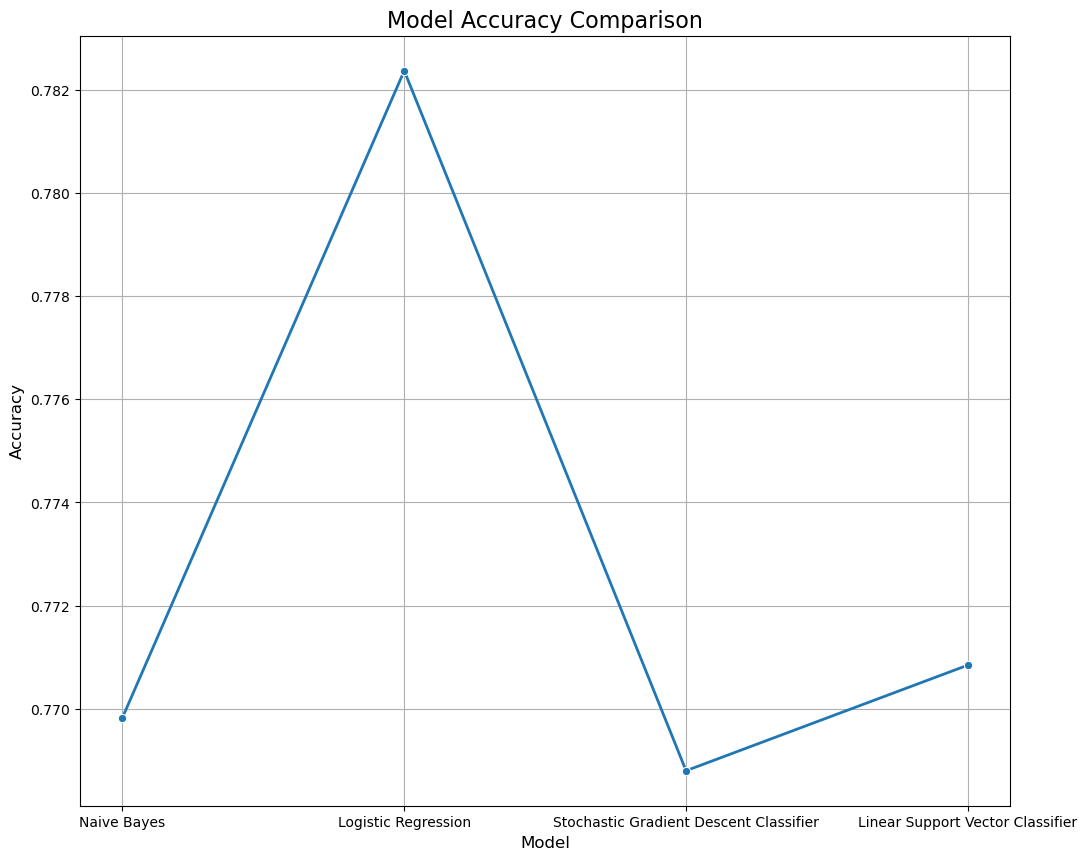

In [42]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df_accuracies, x="Model", y="Accuracy", marker='o', linewidth=2)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(True)
plt.show()